In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [26]:
X = pd.read_csv('/content/X.csv')
y = pd.read_csv('/content/y.csv')
X['ZTAMB'] = 40 / 21 * (X['ZTAMB'] - 7.5)
merged = X.merge(y)

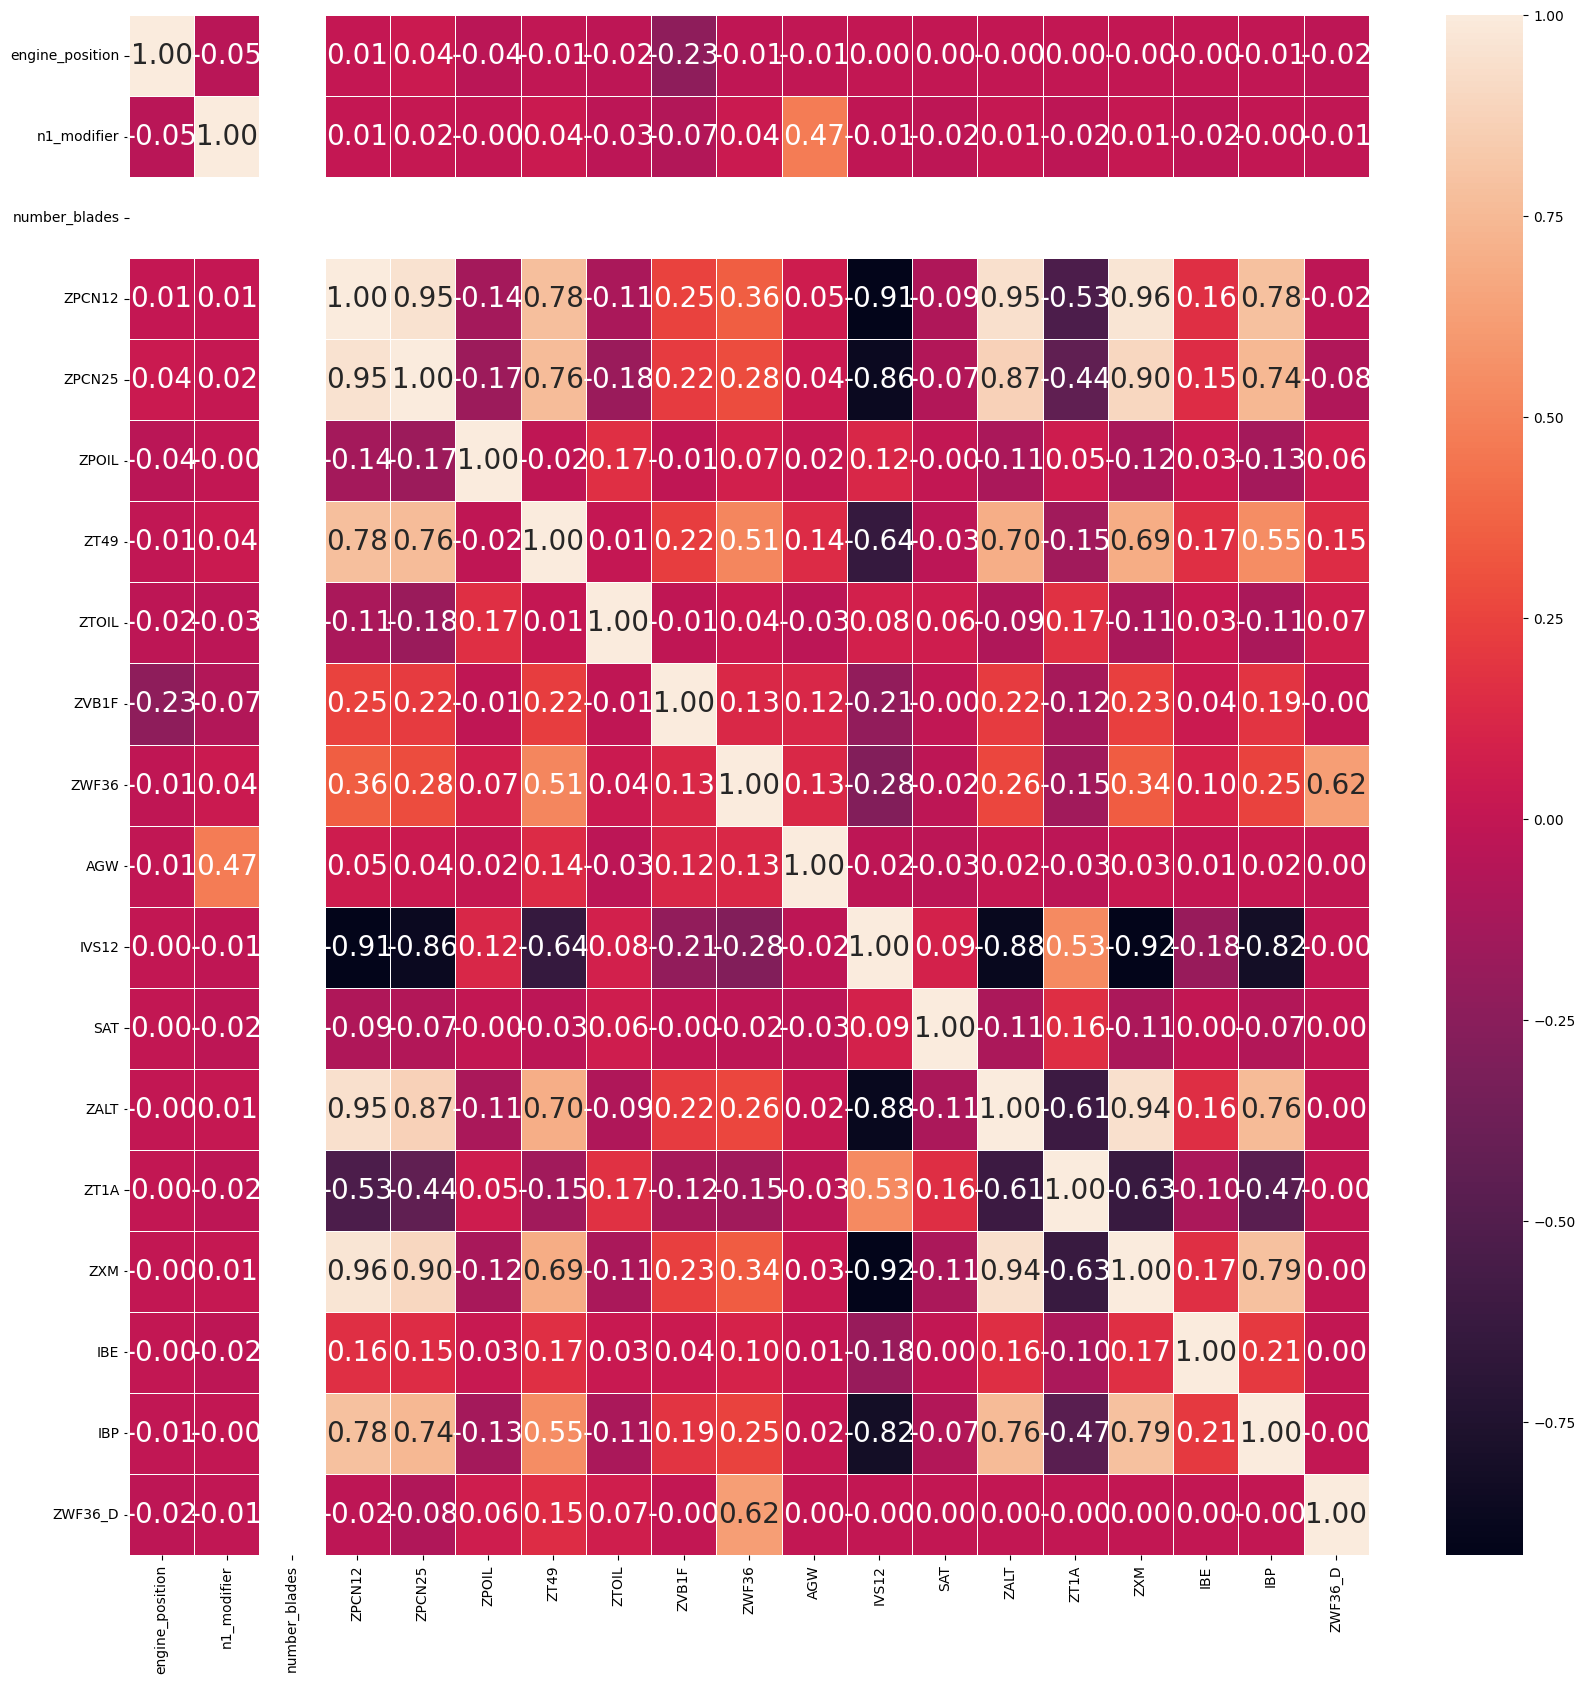

4        24.0
11       24.0
12       24.0
15       24.0
29       24.0
         ... 
95554    24.0
95558    24.0
95575    24.0
95577    24.0
95582    24.0
Name: number_blades, Length: 15009, dtype: float64


In [28]:
#Merged Data
Mt5b = merged[merged['flight_phase'] == 'TAKEOFF']
Mt5b = Mt5b[Mt5b['engine_family'] == 'CFM56-5B']

Mc5b = merged[merged['flight_phase'] == 'CRUISE']
Mc5b = Mc5b[Mc5b['engine_family'] == 'CFM56-5B']

Mt8e = merged[merged['flight_phase'] == 'TAKEOFF']
Mt8e = Mt8e[Mt8e['engine_family'] == 'CF34-8E']

Mc8e = merged[merged['flight_phase'] == 'CRUISE']
Mc8e = Mc8e[Mc8e['engine_family'] == 'CF34-8E']

Mt7 = merged[merged['flight_phase'] == 'TAKEOFF']
Mt7 = Mt7[Mt7['engine_family'] == 'CFM56-7']

Mc7 = merged[merged['flight_phase'] == 'CRUISE']
Mc7 = Mc7[Mc7['engine_family'] == 'CFM56-7']

#Split for X and y for engine_type and flight_phase

col = [0, 2, 3]
for i in range(53, len(Mc7.columns)):
  col.append(i)

Xt5b = Mt5b.iloc[:,:-30]
yt5b = Mt5b.iloc[:,col]

Xc5b = Mc5b.iloc[:,:-30]
yc5b = Mc5b.iloc[:,col]

Xt8e = Mt8e.iloc[:,:-30]
yt8e = Mt8e.iloc[:,col]

Xc8e = Mc8e.iloc[:,:-30]
yc8e = Mc8e.iloc[:,col]

Xt7 = Mt7.iloc[:,:-30]
yt7 = Mt7.iloc[:,col]

Xc7 = Mc7.iloc[:,:-30]
# yc7 = Mc7.iloc[:,col]
yc7 = Mc7.iloc[:,[0, 2, 3, -1]]
Xc7.dropna(axis='columns',how='all', inplace=True)
merged_c7 = Xc7.merge(yc7)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(merged_c7.corr(), annot=True, annot_kws={'size': 20}, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()
count = 0
# Xc7['number_blades'].fillna(10)
# for i in range(len(Xc7['number_blades'])):
print(Xc7['number_blades'])
  # count+=1
# print(count)
# display(Xc7['number_blades'])
# Xc7.to_excel('/content/Xc7.xlsx')

In [31]:
def count_nan_cols(X: pd.DataFrame):
  count = 0
  for i in X.columns:
    for j in X[i]:
      if pd.isna(j):
        count+=1
    print(i, ":", count)
    count=0

In [32]:
count_nan_cols(Xc7)

engine_id : 0
aircraft_id : 0
flight_datetime : 0
flight_phase : 0
engine_position : 0
n1_modifier : 0
number_blades : 0
engine_family : 0
engine_type : 0
manufacturer : 0
ZPCN12 : 0
ZPCN25 : 0
ZPOIL : 0
ZT49 : 0
ZTOIL : 0
ZVB1F : 0
ZWF36 : 0
aircraft_family : 0
aircraft_type : 0
aircraft_grp : 0
ac_manufacturer : 0
AGW : 0
IVS12 : 0
SAT : 0
ZALT : 0
ZT1A : 0
ZXM : 0
IBE : 0
IBP : 0
